In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
melb =pd.read_csv(r'D:\04. Development\01. Data Science\01. Shift Academy\Session 24 - Simple and Multiple Linear Regression\melb_data.csv')
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
plt.style.use('seaborn')

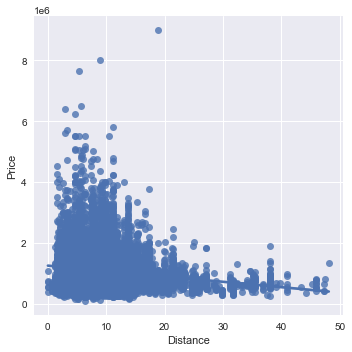

In [8]:
sns.lmplot(data=melb,x='Distance',y='Price')

#### Step 01 - Memisahkan variable independent dan variable dependent (feature)
1. Independen : Distance
2. Dependen : Price

In [9]:
y = melb[['Price']]
x = melb[['Distance']]

#### Step 02 - Memisahkan Data Train dan Data Test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train.shape

(10864, 1)

In [12]:
x_test.shape

(2716, 1)

#### Step 03 - Training Model

In [13]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train) 

LinearRegression()

#### Step 04 - Melihat slope dan intercept

In [14]:
model_lr.coef_[0][0]

-17668.57400414497

In [15]:
model_lr.intercept_[0]

1253396.2205715168

y = mx + c
1. y = Price
2. m = Coefficien
3. x = Distance
4. c = Intercept

In [16]:
distance = int(input('Masukan Jarak :'))

m = model_lr.coef_[0][0]
c = model_lr.intercept_[0]
y = m*distance + c

print(f'Dengan jarak {distance}, diperkirakan harga rumah adalah {y}')

Masukan Jarak :100
Dengan jarak 100, diperkirakan harga rumah adalah -513461.17984298035


#### Step 5 : Evaluasi Model

In [17]:
y_pred = model_lr.predict(x_test)


In [18]:
compare = pd.DataFrame({'Actual': y_test['Price'],
                        'Predict': y_pred.flatten()})
compare

,Actual,Predict
1061,2600000.0,1.055508e+06
6482,620000.0,1.219826e+06
8395,1000000.0,1.145618e+06
4659,430000.0,1.078477e+06
7386,392250.0,1.092612e+06
...,...,...
10455,1415000.0,8.735219e+05
3616,6500000.0,1.154452e+06
577,2450000.0,1.082011e+06
12620,1155000.0,9.936682e+05


<AxesSubplot:>

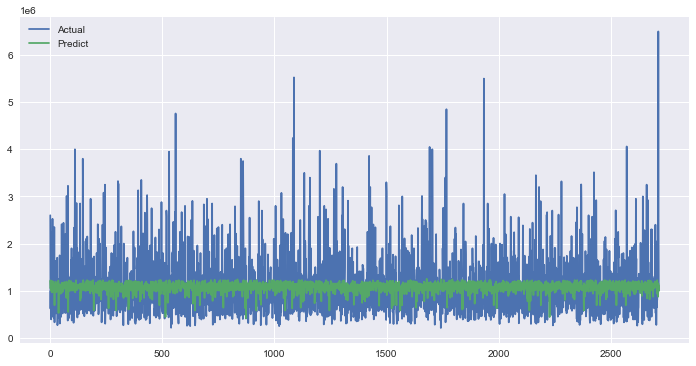

In [19]:
df1 = compare.reset_index().drop('index', axis=1)
df1.plot(figsize=(12,6))

In [21]:
metrics.mean_absolute_error(y_test,y_pred)

449114.7897798854

In [23]:
adm =pd.read_csv(r'D:\04. Development\01. Data Science\01. Shift Academy\Session 24 - Simple and Multiple Linear Regression\Admission_Predict.csv')
adm.drop('Serial No.',axis=1, inplace=True)
adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
adm.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [30]:
#memisahkan independen dan dependen
x = adm.drop('Chance of Admit ',axis=1)
y = adm[['Chance of Admit ']]

#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2,random_state=42)

#fitting model untuk prediction
model_mlr = LinearRegression()
model_mlr.fit(x_train, y_train)

LinearRegression()

In [33]:
pd.DataFrame({'Variable': x.columns, 'Coefficient': model_mlr.coef_[0]})

,Variable,Coefficient
0,GRE Score,0.002409
1,TOEFL Score,0.003568
2,University Rating,0.011938
3,SOP,-0.011981
4,LOR,0.019962
5,CGPA,0.114637
6,Research,0.003571


<AxesSubplot:>

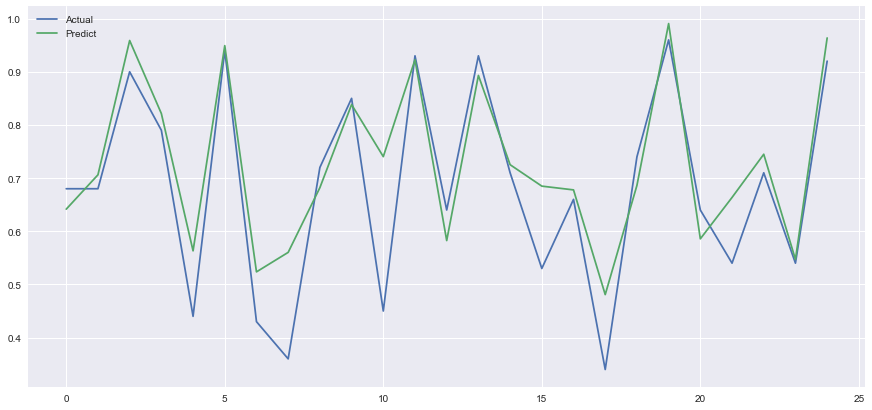

In [42]:
y_pred = model_mlr.predict(x_test)

compare = pd.DataFrame({'Actual' : y_test['Chance of Admit '],
                        'Predict' : y_pred.flatten()})
compare = compare.reset_index().drop('index',axis = 1)
compare.head(25).plot(figsize=(15,7))

In [43]:
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 :', metrics.r2_score(y_test,y_pred))

MAE : 0.048108598411912964
MSE : 0.0048055663606589956
RMSE : 0.06932219241093718
R2 : 0.7630170410963671


#### Regularization - Ridge, Lasso, ElasticNet

In [44]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [54]:
ridge = Ridge()
lasso = Lasso()
elasticNet = ElasticNet()

ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
elasticNet.fit(x_train,y_train)

r_pred = ridge.predict(x_test)
l_pred = lasso.predict(x_test)
en_pred = elasticNet.predict(x_test)

all_pred = pd.DataFrame({'Actual':y_test['Chance of Admit '],
                         'LinearRegression': y_pred.flatten(),
                         'Ridge': r_pred.flatten(),
                         'Lasso': l_pred.flatten(),
                         'ElasticNet':en_pred.flatten()})

all_pred = all_pred.reset_index().drop('index',axis=1)

<AxesSubplot:>

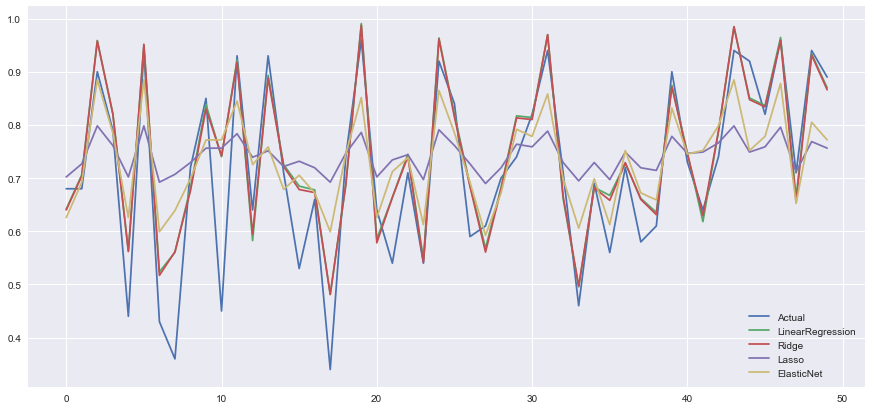

In [57]:
all_pred.head(50).plot(figsize=(15,7))

#### Polynomial Regression

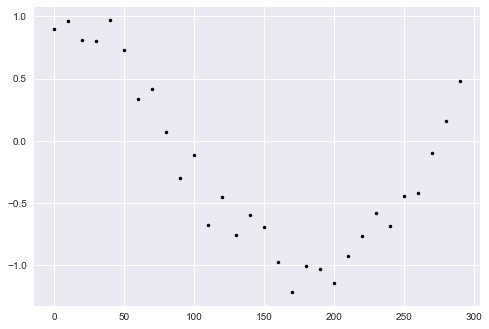

In [66]:
x = np.arange(0,300,10)
y = np.cos(x*np.pi/180) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame({'X':x, 'Y':y})

plt.plot(df['X'],df['Y'],'.',c='black')

In [67]:
df1 = df.copy()
df1

,X,Y
0,0,0.898575
1,10,0.962554
2,20,0.806677
3,30,0.800339
4,40,0.967531
5,50,0.733356
6,60,0.338326
7,70,0.416465
8,80,0.073858
9,90,-0.303900


In [68]:
ridge = Ridge()
lasso = Lasso()
elasticNet = ElasticNet()

ridge.fit(df[['X']],df[['Y']])
lasso.fit(df[['X']],df[['Y']])
elasticNet.fit(df[['X']],df[['Y']])

df1['LinearRegression'] = model_lr.predict(df[['X']])
df1['Ridge'] = ridge.predict(df[['X']])
df1['Lasso'] = lasso.predict(df[['X']])
df1['ElasticNet'] = elasticNet.predict(df[['X']])
df1.head()

,X,Y,LinearRegression,Ridge,Lasso,ElasticNet
0,0,0.898575,1.253396e+06,0.475018,0.455666,0.465298
1,10,0.962554,1.076710e+06,0.427834,0.409817,0.418785
2,20,0.806677,9.000247e+05,0.380651,0.363968,0.372272
3,30,0.800339,7.233390e+05,0.333467,0.318119,0.325759
4,40,0.967531,5.466533e+05,0.286284,0.272270,0.279245


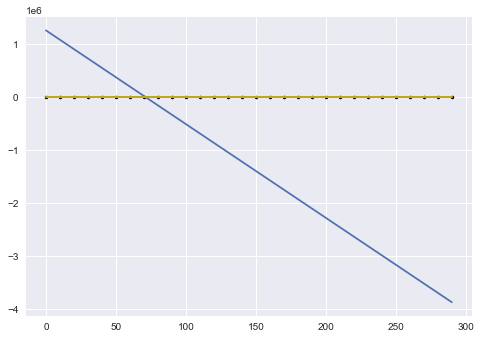

In [83]:
plt.plot(df[['X']],df[['Y']],'.',c='black')
plt.plot(df[['X']],df1[['LinearRegression']],'-')
plt.plot(df[['X']],df1[['Ridge']],'-',color='r')
plt.plot(df[['X']],df1[['Lasso']],'-',color='m')
plt.plot(df[['X']],df1[['ElasticNet']],'-',color='y')

In [75]:
df2 = df.copy()

for i in range(2,10):
    df2[f'X{i}'] = df2['X']**i
df2.head()

,X,Y,X2,X3,X4,X5,X6,X7,X8,X9
0,0,0.898575,0,0,0,0,0,0,0,0
1,10,0.962554,100,1000,10000,100000,1000000,10000000,100000000,1000000000
2,20,0.806677,400,8000,160000,3200000,64000000,1280000000,-169803776,898891776
3,30,0.800339,900,27000,810000,24300000,729000000,395163520,-1029996288,-835117568
4,40,0.967531,1600,64000,2560000,102400000,-198967296,631242752,-520093696,671088640


In [79]:
model_poly = LinearRegression()
xn = ['X']
for i in range(2,10):
    xn.append(f'X{i}')
    model_poly.fit(df2[xn], df2['Y'])
    df2[f'y_Poly{i}'] = model_poly.predict(df2[xn])
df2.head()

,X,Y,X2,X3,X4,X5,X6,X7,X8,X9,y_Poly2,y_Poly3,y_Poly4,y_Poly5,y_Poly6,y_Poly7,y_Poly8,y_Poly9
0,0,0.898575,0,0,0,0,0,0,0,0,1.493232,1.074245,1.068911,1.064788,1.064786,1.066525,1.066707,1.036551
1,10,0.962554,100,1000,10000,100000,1000000,10000000,100000000,1000000000,1.235384,0.989771,0.985648,0.982307,0.982303,0.984679,0.993579,1.018830
2,20,0.806677,400,8000,160000,3200000,64000000,1280000000,-169803776,898891776,0.992583,0.889384,0.886716,0.884095,0.884080,0.875678,0.877621,0.887446
3,30,0.800339,900,27000,810000,24300000,729000000,395163520,-1029996288,-835117568,0.764830,0.775379,0.774349,0.772574,0.772458,0.772256,0.764279,0.693543
4,40,0.967531,1600,64000,2560000,102400000,-198967296,631242752,-520093696,671088640,0.552124,0.650048,0.650773,0.650443,0.650470,0.648323,0.646902,0.655608


<function matplotlib.pyplot.show(close=None, block=None)>

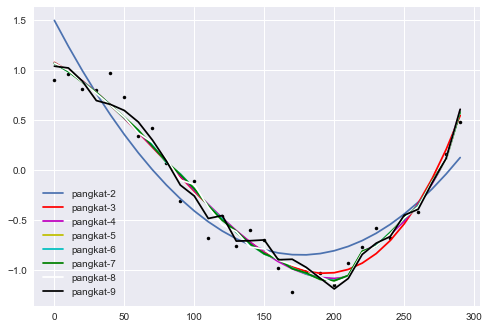

In [82]:
plt.plot(df2[['X']],df2[['Y']],'.',c='black')
plt.plot(df2[['X']],df2[['y_Poly2']],'-',label='pangkat-2')
plt.plot(df2[['X']],df2[['y_Poly3']],'-',color='r',label='pangkat-3')
plt.plot(df2[['X']],df2[['y_Poly4']],'-',color='m',label='pangkat-4')
plt.plot(df2[['X']],df2[['y_Poly5']],'-',color='y',label='pangkat-5')
plt.plot(df2[['X']],df2[['y_Poly6']],'-',color='c',label='pangkat-6')
plt.plot(df2[['X']],df2[['y_Poly7']],'-',color='g',label='pangkat-7')
plt.plot(df2[['X']],df2[['y_Poly8']],'-',color='w',label='pangkat-8')
plt.plot(df2[['X']],df2[['y_Poly9']],'-',color='k',label='pangkat-9')

plt.legend()
plt.show

In [90]:
for i in range(2,10):
    print(f'RSME Poly {i}', np.sqrt(metrics.mean_squared_error(df2['Y'],df2[f'y_Poly{i}'])))

RSME Poly 2 0.24355221310958475
RSME Poly 3 0.14789019959430302
RSME Poly 4 0.14178190173142016
RSME Poly 5 0.14112537879858159
RSME Poly 6 0.14112530701622264
RSME Poly 7 0.1409128304415941
RSME Poly 8 0.1385722387560148
RSME Poly 9 0.12685883104437923
